In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('data.tsv', sep='\t', header=None)

# Rename 0th column to 'label'
df.rename(columns={0: 'label'}, inplace=True)

df

,label,1,2,3,4,5,6,7,8,9
0,1,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,1,551.879287,0.232478,0.063530,264.804935,11888.391830,44.894903,77.793297,253.785300,656.769449
3,1,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,1,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...
101,6,2000.000000,0.106989,0.105418,520.222649,40087.920980,77.059161,204.090347,478.517223,2088.648870
102,6,2600.000000,0.200538,0.208043,1063.441427,174480.476200,164.071543,418.687286,977.552367,2664.583623
103,6,1600.000000,0.071908,-0.066323,436.943603,12655.342130,28.963331,103.732704,432.129749,1475.371534
104,6,2300.000000,0.045029,0.136834,185.446044,5086.292497,27.427344,178.691742,49.593290,2480.592151


## Reduce dimensionality using PCA

In [21]:
# Scale and train test split

from sklearn.model_selection import train_test_split

train_split = 0.8
x_train, x_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], train_size=train_split, random_state=42)
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)


In [22]:
x_train

,1,2,3,4,5,6,7,8,9
0,178.000000,0.149575,0.099135,40.290621,474.404699,11.774569,25.920828,30.845499,209.180738
1,259.885145,0.070686,0.006981,58.243807,465.087265,7.985180,17.506838,56.340241,267.517446
2,196.856714,0.020071,0.090757,28.593126,82.058889,2.869882,7.968783,27.661516,200.749336
3,341.620013,0.091979,0.074002,85.043029,1370.838068,16.119347,29.028969,79.935197,385.133460
4,121.000000,0.174184,0.090757,24.437180,144.466513,5.911750,22.021080,10.594708,141.766185
...,...,...,...,...,...,...,...,...,...
79,1385.664721,0.092328,0.089361,202.480044,8785.028733,43.387134,143.092194,143.257780,1524.609204
80,485.668806,0.230209,0.134041,253.893699,8135.968359,32.044783,64.855446,245.470531,541.363975
81,1800.000000,0.091979,0.205251,362.863321,15021.553890,41.397278,217.833969,290.203640,1893.663712
82,274.993396,0.147131,0.137532,66.457943,1217.415651,18.318588,40.849678,52.421008,327.558639


In [23]:
# Scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [29]:
x_train.var(axis=0), x_train.mean(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 1.11022302e-16,  1.63890066e-16,  1.40099572e-16, -1.05735526e-17,
        -4.22942105e-17,  9.51619735e-17, -3.17206578e-17, -7.40148683e-17,
        -1.16309079e-16]))

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_train = pca.fit_transform(x_train)  # Fit on training data
x_test = pca.transform(x_test)

In [33]:
explained_variance = pca.explained_variance_ratio_

explained_variance = sum(explained_variance)
explained_variance

0.815713004098801

## Visualization

visualize the result of PCA

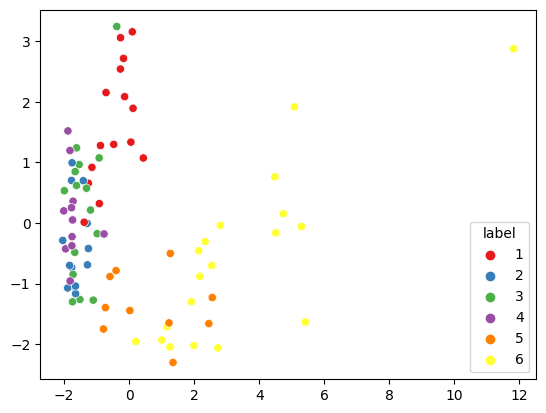

In [40]:
import seaborn as sns

# Plot with classes
plot = sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train, palette='Set1')


In [47]:
from sklearn.cluster import KMeans

# We will not use classes and instead try to cluster the data and see if we can get the same results

n_clusters = df['label'].nunique()

# Use K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x_train)


c:\Users\itznu\anaconda3\envs\stats\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

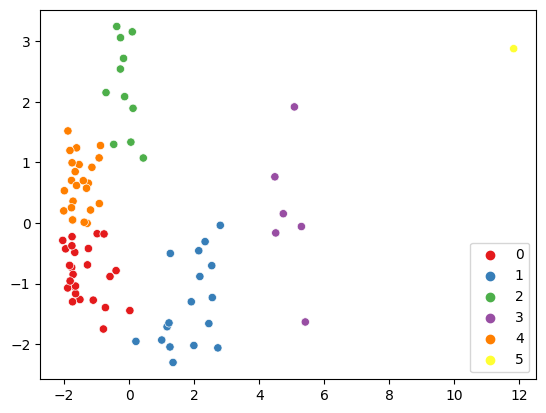

In [48]:
# Plot with clusters

plot = sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=kmeans.labels_, palette='Set1')

# Perform linear and quadratic discriminant analysis

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis(n_components=2)
lda_model.fit(x_train, y_train)

qda_model = QuadraticDiscriminantAnalysis(n_components=2)
qda_model.fit(x_train, y_train)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [49]:
# Plot with LDA

plot = sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=lda_model.predict(x_train), palette='Set1')

NameError: name 'lda_model' is not defined